In [4]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
merged_df = pd.merge(ride_data_df, city_data_df, how='left')
# Display the data table for preview

In [5]:
merged_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [6]:
urban = merged_df.loc[merged_df["type"] == "Urban", :].groupby("city")
suburban = merged_df.loc[merged_df["type"] == "Suburban", :].groupby("city")
rural = merged_df.loc[merged_df["type"] == "Rural", :].groupby("city")

## Bubble Plot of Ride Sharing Data

In [8]:
# Obtain the x and y coordinates for each of the three city types
# Build the scatter plots for each city types
# Incorporate the other graph properties
# Create a legend
# Incorporate a text label regarding circle size
# Save Figure

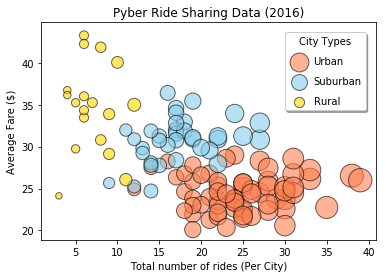

<Figure size 432x288 with 0 Axes>

In [30]:
number_of_rides_per_urban_city = urban["ride_id"].count()
average_urban_fare = urban["fare"].mean()

x_axis = number_of_rides_per_urban_city
y_axis = average_urban_fare

plt.scatter(x_axis, y_axis, marker="o", facecolors="coral", edgecolors="black", 
            s=x_axis*14, alpha=".6", label='Urban')

number_of_rides_per_suburban_city = suburban["ride_id"].count()
average_suburban_fare = suburban["fare"].mean()

x_axis = number_of_rides_per_suburban_city
y_axis = average_suburban_fare

plt.scatter(x_axis, y_axis, marker="o", facecolors="skyblue", edgecolors="black", 
            s=x_axis*14, alpha=".6", label='Suburban')

number_of_rides_per_rural_city = rural["ride_id"].count()
average_rural_fare = rural["fare"].mean()

x_axis = number_of_rides_per_rural_city
y_axis = average_rural_fare

plt.scatter(x_axis, y_axis, marker="o", facecolors="gold", edgecolors="black", 
            s=x_axis*14, alpha=".6", label='Rural')

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total number of rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.legend(loc='upper right', title="City Types", shadow="True", labelspacing=1,handletextpad=.5, borderaxespad=1)
plt.show()
plt.savefig('Pyber_Ride_Sharing_Data.png')

## Total Fares 

In [31]:
urban_fare = sum(urban["fare"].sum().to_list())
suburban_fare = sum(suburban["fare"].sum().to_list())
rural_fare = sum(rural["fare"].sum().to_list())

urban_rides = urban["ride_id"].count().sum()
suburban_rides = suburban["ride_id"].count().sum()
rural_rides = rural["ride_id"].count().sum()

urban_drivers = sum(urban["driver_count"].sum().to_list())
suburban_drivers = sum(suburban["driver_count"].sum().to_list())
rural_drivers = sum(rural["driver_count"].sum().to_list())

## Total Rides by City Type

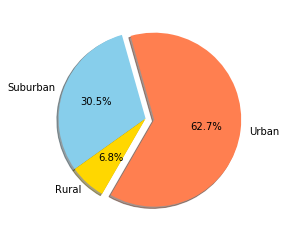

<Figure size 432x288 with 0 Axes>

In [32]:
# Labels for the sections of our pie chart
labels = ["Urban", "Suburban", "Rural"]
sizes = [urban_fare, suburban_fare, rural_fare]
colors = ["Coral", "skyblue", "gold"]
# Tells matplotlib to seperate the "Python" section from the others
explode = (.1, 0, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=-120)
plt.show()
plt.savefig('Total_rides_by_city_type.png')

## Total Fares by City Type

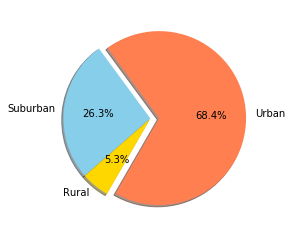

<Figure size 432x288 with 0 Axes>

In [33]:
labels = ["Urban", "Suburban", "Rural"]
sizes = [urban_rides, suburban_rides, rural_rides]
colors = ["Coral", "skyblue", "gold"]
# Tells matplotlib to seperate the "Python" section from the others
explode = (.1, 0, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=-120)
plt.show()
plt.savefig('Total_fares_by_city_type.png')

## Total Drivers by City Type

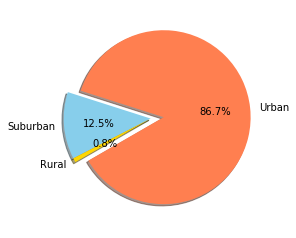

<Figure size 432x288 with 0 Axes>

In [34]:
labels = ["Urban", "Suburban", "Rural"]
sizes = [urban_drivers, suburban_drivers, rural_drivers]
colors = ["coral", "skyblue", "gold"]
# Tells matplotlib to seperate the "Python" section from the others
explode = (.15, 0, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=-150)
plt.show()
plt.savefig('Total_drivers_by_city_type.png')